In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog as fd

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
root = tk.Tk()
file = fd.askopenfile()
root.destroy()

df = pd.read_csv(file.name, error_bad_lines=False, header=None, usecols=[0,1])
df["value"] = df[1].apply(lambda x: x.split()[1]).apply(lambda x: int(x,16))
df = df.sample(len(df.index))
df.reset_index(drop=True,inplace=True)
df.head()

,0,1,value
0,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0x4b92 (correct),19346
1,delton.55882 > 104.244.42.130.https: Flags...,cksum 0x3314 (correct),13076
2,172.67.74.104.https > delton.34406: Flags ...,cksum 0xa17d (correct),41341
3,delton.55882 > 104.244.42.130.https: Flags...,cksum 0x29c0 (correct),10688
4,185.162.184.34.52281 > delton.51575: Flags...,cksum 0x98ba (correct),39098


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293776 entries, 0 to 293775
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       293776 non-null  object
 1   1       293776 non-null  object
 2   value   293776 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


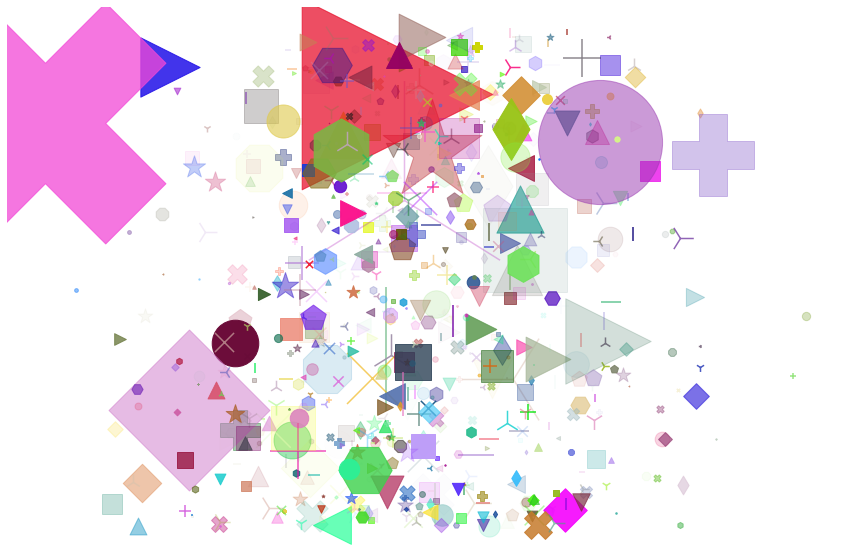

In [6]:
dfs = df.sample(750)
len_df = len(dfs.index)

dfs["x"] = np.random.randn(len_df) * np.exp(np.pi**2)
dfs["y"] = np.random.rand(len_df) ** np.log(np.pi)

def rand_num():
    number = np.random.choice(np.abs(np.random.normal(0,1,len_df)))
    if number > 1:
        number = number - np.floor(number)
    return number

style = np.random.choice(["dark_background","seaborn-white"])
plt.style.use(style)
plt.figure(figsize=(15,10))

plt.axis("off")

for i in dfs.index:
    marker = np.random.choice([".",",","o","v","^","<",">","1","2","3","4","8","s","p","P",
                               "*","h","H","+","x","X","d","D","|","_"])
    rgba = [np.random.random() for _ in range(4)]
    colour = np.array([rgba])
    alpha = rand_num()

    rand_divisor = np.random.choice(np.random.randint(1,501,len_df))
    size = dfs.loc[i,"value"]/(np.random.choice(np.abs(rand_divisor/np.random.normal(-1,1,len_df))))

    plt.scatter(dfs.loc[i,"x"], dfs.loc[i,"y"], marker=marker, color=colour, s=size, alpha=alpha)

#https://www.tutorialspoint.com/save-file-dialog-box-in-tkinter
root = tk.Tk()
file = fd.asksaveasfile(mode='w', 
                       initialfile = 'Untitled.svg',
                       defaultextension=".svg",
                       filetypes=[("SVG", "*.svg")])
root.destroy()

if file:
    plt.savefig(file, format="svg")
    file.close()

plt.show();